In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

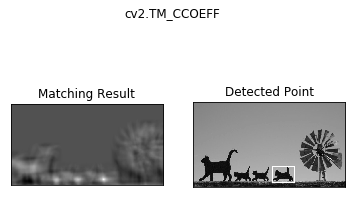

[[-220716.33 -219396.56 -216553.58 ... -262741.94 -266628.8  -270474.34]
 [-222633.31 -221553.02 -219237.77 ... -264547.16 -268586.3  -272096.12]
 [-224143.1  -223702.28 -221786.77 ... -263677.47 -267772.88 -270842.94]
 ...
 [ 418651.47  384387.5   467825.1  ...  782286.44 1139068.5  1503549.5 ]
 [ 609900.2   524590.    598503.75 ... 1583194.1  1920709.2  2256607.5 ]
 [ 730044.2   650174.94  711831.75 ... 2290987.2  2622956.8  2931760.8 ]]


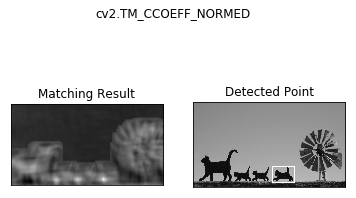

[[-0.22233151 -0.22069256 -0.21745221 ... -0.29115394 -0.29514545
  -0.29891914]
 [-0.22433062 -0.22294742 -0.2202231  ... -0.29349142 -0.2976294
  -0.3010001 ]
 [-0.22575542 -0.22503082 -0.22269607 ... -0.2937806  -0.29797947
  -0.30084854]
 ...
 [ 0.01413682  0.01296559  0.01576594 ...  0.02793945  0.04074134
   0.05385024]
 [ 0.02067544  0.01776532  0.02025217 ...  0.05580614  0.06776038
   0.07967189]
 [ 0.0248793   0.0221368   0.02421743 ...  0.0798323   0.09143586
   0.10222724]]


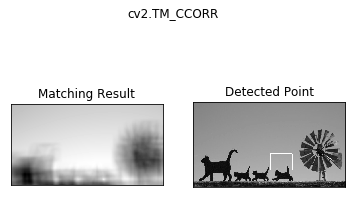

[[88221544. 88253400. 88288800. ... 92765900. 92741250. 92716070.]
 [88282610. 88314000. 88348760. ... 92830560. 92805864. 92781140.]
 [88344420. 88374940. 88409190. ... 92896660. 92872020. 92847840.]
 ...
 [61720484. 61442716. 61278610. ... 86291384. 87054790. 87824664.]
 [61326380. 61013732. 60856940. ... 85738030. 86463090. 87186980.]
 [60949412. 60660390. 60505264. ... 85092580. 85795920. 86475090.]]


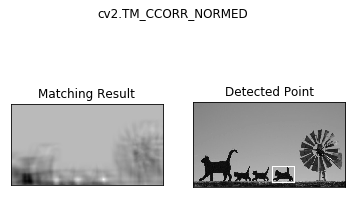

[[0.8305296  0.83054245 0.8305696  ... 0.8302858  0.83025026 0.830215  ]
 [0.83051324 0.8305239  0.8305461  ... 0.83027166 0.83023477 0.83020246]
 [0.8305006  0.83050525 0.83052367 ... 0.830282   0.8302446  0.8302162 ]
 ...
 [0.6782873  0.67673576 0.67650557 ... 0.75388545 0.7578678  0.7618657 ]
 [0.679113   0.6770613  0.67680675 ... 0.75669277 0.76043534 0.7641237 ]
 [0.67981255 0.67789847 0.6775678  ... 0.7588621  0.7625073  0.76589674]]


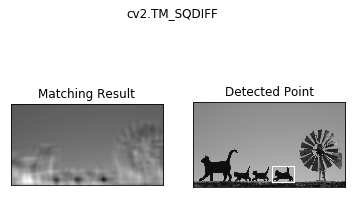

[[36006136. 36015480. 36022612. ... 38154360. 38151536. 38148380.]
 [36034520. 36044304. 36052504. ... 38192080. 38189584. 38185780.]
 [36062376. 36073390. 36082410. ... 38223776. 38221416. 38216760.]
 ...
 [60877290. 61089176. 61057772. ... 56896770. 56241732. 55580936.]
 [60492176. 60799550. 60779650. ... 55537428. 54928936. 54331496.]
 [60154780. 60442210. 60442216. ... 54348384. 53754652. 53217290.]]


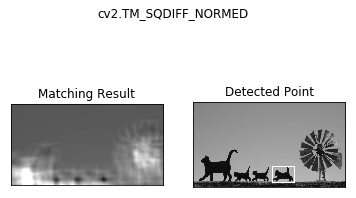

[[0.33896664 0.33893746 0.33887976 ... 0.34149426 0.34154513 0.3415951 ]
 [0.33899254 0.3389684  0.3389212  ... 0.34158796 0.34164134 0.3416851 ]
 [0.3390121  0.33900043 0.3389613  ... 0.34163243 0.3416866  0.34172225]
 ...
 [0.6690209  0.67284185 0.67406756 ... 0.49707913 0.48962033 0.4821562 ]
 [0.6698752  0.6746846  0.6759471  ... 0.4901532  0.48309523 0.47617182]
 [0.67094946 0.6754602  0.67686176 ... 0.48468304 0.47774202 0.47133747]]


In [2]:
img = cv2.imread('target.jpg',0)
img2 = img.copy()
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()
    print(res)

In [3]:
import torch

In [4]:
@torch.no_grad()
def matchTemplateTorch(img, template):
    img_tensor = torch.from_numpy(img).unsqueeze(dim=0).unsqueeze(dim=0).type(torch.float32).cuda()
    template_tensor = torch.from_numpy(template).unsqueeze(dim=0).unsqueeze(dim=0).type(torch.float32).cuda()
    result = matchTemplateTorchCore(img_tensor, template_tensor)
    return result.cpu().numpy()
    
@torch.jit.script    
def matchTemplateTorchCore(img_tensor, template_tensor):
    result1 = torch.nn.functional.conv2d(img_tensor, template_tensor, bias=None, stride=1, padding=0)
    result2 = torch.sqrt(torch.sum(template_tensor**2) * torch.nn.functional.conv2d(img_tensor**2, torch.ones_like(template_tensor), bias=None, stride=1, padding=0))

    return (result1/result2).squeeze(0).squeeze(0)
    #return (result1).squeeze(0).squeeze(0)
img = img2.copy()
print(matchTemplateTorch(img, template))

[[0.83054644 0.83055925 0.830587   ... 0.83030295 0.8302675  0.8302346 ]
 [0.8305302  0.83054096 0.8305641  ... 0.83028835 0.8302515  0.8302207 ]
 [0.8305184  0.83052194 0.83054066 ... 0.8302987  0.83026236 0.83023244]
 ...
 [0.67830116 0.67674893 0.6765194  ... 0.7538996  0.7578806  0.76187956]
 [0.6791257  0.6770753  0.67682123 ... 0.75670516 0.76045036 0.7641375 ]
 [0.67982566 0.677912   0.6775808  ... 0.75887567 0.76252186 0.76591367]]


[[0.83054644 0.83055925 0.830587   ... 0.83030295 0.8302675  0.8302346 ]
 [0.8305302  0.83054096 0.8305641  ... 0.83028835 0.8302515  0.8302207 ]
 [0.8305184  0.83052194 0.83054066 ... 0.8302987  0.83026236 0.83023244]
 ...
 [0.67830116 0.67674893 0.6765194  ... 0.7538996  0.7578806  0.76187956]
 [0.6791257  0.6770753  0.67682123 ... 0.75670516 0.76045036 0.7641375 ]
 [0.67982566 0.677912   0.6775808  ... 0.75887567 0.76252186 0.76591367]]


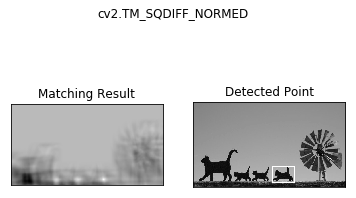

In [5]:
img = img2.copy()

# Apply template Matching
res = matchTemplateTorch(img,template)
print(res)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 2)

plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)

plt.show()